In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_image,train_label),(test_image,test_label)=\
    tf.keras.datasets.fashion_mnist.load_data()
print("train_image : ",train_image.shape)
print("train_label : ",train_label.shape)
print("test_image : ",test_image.shape)
print("test_label : ",test_label.shape)

4422102/4422102 [==============================] - 1s 0us/step
train_image :  (60000, 28, 28)
train_label :  (60000,)
test_image :  (10000, 28, 28)
test_label :  (10000,)


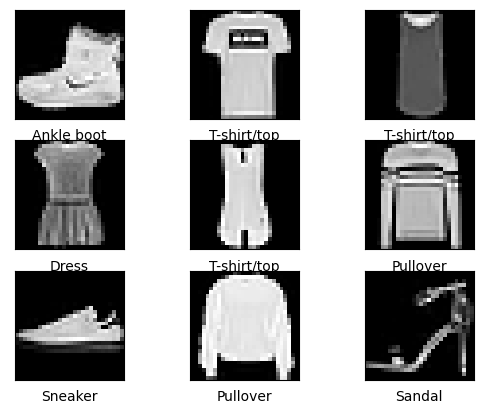

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
# 顯示指定的影像 (這裡顯示九張)
def ShowImage(x,y):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y[i]])
    plt.show()

ShowImage(train_image,train_label)

In [3]:
# 對資料集做一個前置處理, 將資料正規到 0~1 之間
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)  # 用來比大小時如果是浮點數可能會不相等
    return x,y

# 建立模型
def build_model():
    # 線性疊加
    model = tf.keras.models.Sequential()
    # 改變平坦輸入
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    # 第一層隱藏層, 包含256個神經元
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    # 第二層隱藏層, 包含128個神經元
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    # 第三層隱藏層, 包含256個神經元
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    # 第四層為輸出層分 10 個類別
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    return model

model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# 編譯模型
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, train_labels = preprocess(train_image, train_label)
batchsz = 128  # 設定批次大小
# 訓練模型
history = model.fit(train_images, train_labels,epochs=100,
                    batch_size = batchsz,   # 設定批次訓練大小
                    validation_split = 0.2,    # 劃分資料集的 20% 作為驗證集用
                    verbose = 2)  # 印出為精簡模式

Epoch 1/100
375/375 - 3s - loss: 0.5540 - accuracy: 0.8069 - val_loss: 0.4098 - val_accuracy: 0.8533 - 3s/epoch - 7ms/step
Epoch 2/100
375/375 - 3s - loss: 0.3871 - accuracy: 0.8609 - val_loss: 0.3719 - val_accuracy: 0.8694 - 3s/epoch - 7ms/step
Epoch 3/100
375/375 - 3s - loss: 0.3402 - accuracy: 0.8752 - val_loss: 0.3546 - val_accuracy: 0.8735 - 3s/epoch - 8ms/step
Epoch 4/100
375/375 - 3s - loss: 0.3186 - accuracy: 0.8821 - val_loss: 0.3423 - val_accuracy: 0.8753 - 3s/epoch - 8ms/step
Epoch 5/100
375/375 - 3s - loss: 0.2972 - accuracy: 0.8893 - val_loss: 0.3324 - val_accuracy: 0.8804 - 3s/epoch - 9ms/step
Epoch 6/100
375/375 - 4s - loss: 0.2835 - accuracy: 0.8955 - val_loss: 0.3249 - val_accuracy: 0.8826 - 4s/epoch - 10ms/step
Epoch 7/100
375/375 - 4s - loss: 0.2686 - accuracy: 0.9010 - val_loss: 0.3213 - val_accuracy: 0.8855 - 4s/epoch - 10ms/step
Epoch 8/100
375/375 - 4s - loss: 0.2575 - accuracy: 0.9045 - val_loss: 0.3144 - val_accuracy: 0.8872 - 4s/epoch - 10ms/step
Epoch 9/100
3

Epoch 67/100
375/375 - 4s - loss: 0.0481 - accuracy: 0.9823 - val_loss: 0.5894 - val_accuracy: 0.8948 - 4s/epoch - 11ms/step
Epoch 68/100
375/375 - 4s - loss: 0.0495 - accuracy: 0.9821 - val_loss: 0.6302 - val_accuracy: 0.8898 - 4s/epoch - 10ms/step
Epoch 69/100
375/375 - 4s - loss: 0.0578 - accuracy: 0.9786 - val_loss: 0.5816 - val_accuracy: 0.8907 - 4s/epoch - 11ms/step
Epoch 70/100
375/375 - 4s - loss: 0.0476 - accuracy: 0.9821 - val_loss: 0.6328 - val_accuracy: 0.8936 - 4s/epoch - 11ms/step
Epoch 71/100
375/375 - 3s - loss: 0.0490 - accuracy: 0.9815 - val_loss: 0.6384 - val_accuracy: 0.8953 - 3s/epoch - 7ms/step
Epoch 72/100
375/375 - 3s - loss: 0.0508 - accuracy: 0.9818 - val_loss: 0.6579 - val_accuracy: 0.8944 - 3s/epoch - 8ms/step
Epoch 73/100
375/375 - 3s - loss: 0.0360 - accuracy: 0.9863 - val_loss: 0.6817 - val_accuracy: 0.8940 - 3s/epoch - 7ms/step
Epoch 74/100
375/375 - 3s - loss: 0.0424 - accuracy: 0.9847 - val_loss: 0.7271 - val_accuracy: 0.8832 - 3s/epoch - 8ms/step
Epoc

In [5]:
import numpy as np
# 測試資料的預處理
test_image, test_labels = preprocess(test_image, test_label)
predicted_image15 = model.predict(test_image[:15])  # 將前15比做預測
predicted_ids15 = np.argmax(predicted_image15, axis=-1)  # 取出機率最大的 index
print("Predicted labels: ", predicted_ids15[:15])
print("test labels: ", test_label[:15])

1/1 [==============================] - 0s 324ms/step
Predicted labels:  [9 2 1 1 6 1 4 6 5 7 4 5 8 3 4]
test labels:  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4]


In [6]:
# 儲存網路
model.save('Fashion_model.h5')
print('Save Model')
del model

Save Model


In [7]:
# 載入模型
print('loaded model from Fashion_model.h5')
Model2 = tf.keras.models.load_model('Fashion_model.h5',compile=False)  # 千萬不要compile因為已經都好了
# 拿前十五筆資料來預測並印出標籤
prediction = Model2.predict(test_image[:15])
print(tf.argmax(prediction,1))
# 印出前十五筆資料的正確標籤
print(test_labels[:15])

loaded model from Fashion_model.h5
1/1 [==============================] - 0s 181ms/step
tf.Tensor([9 2 1 1 6 1 4 6 5 7 4 5 8 3 4], shape=(15,), dtype=int64)
tf.Tensor([9 2 1 1 6 1 4 6 5 7 4 5 7 3 4], shape=(15,), dtype=int32)


In [8]:
"""
predicted_image = model.predict(test_image)  # 進行預測
print(predicted_image.shape)
predicted_ids = np.argmax(predicted_image, axis=-1)  # 取出機率最大的 index
print("Predicted labels: ", predicted_ids)
print("test labels: ", test_label)
# 比較兩個 predicted_ids 與 test_label 是否相同
correct_prediction = tf.equal(predicted_ids,test_label)  
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
print(accuracy*100)

"""

'\npredicted_image = model.predict(test_image)  # 進行預測\nprint(predicted_image.shape)\npredicted_ids = np.argmax(predicted_image, axis=-1)  # 取出機率最大的 index\nprint("Predicted labels: ", predicted_ids)\nprint("test labels: ", test_label)\n# 比較兩個 predicted_ids 與 test_label 是否相同\ncorrect_prediction = tf.equal(predicted_ids,test_label)  \naccuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))\nprint(accuracy*100)\n\n'